In [2]:
import numpy as np
import pandas as pd
import os

from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

import pickle
import time

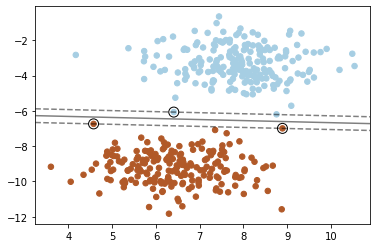

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples=400, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Actual Data Classification

## Dealing with Data Crap

### Load Data

In [3]:
# with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/train_vectors/train_features.pkl", "rb") \
#         as input_file:  train_features = pickle.load(input_file)
    
# with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/train_vectors/train_labels.pkl", "rb") \
#     as input_file:  train_labels = pickle.load(input_file)

# with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/test_vectors/test_features.pkl", "rb") \
#         as input_file:  test_features = pickle.load(input_file)
    
# with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/test_vectors/test_labels.pkl", "rb") \
#     as input_file:  test_labels = pickle.load(input_file)

test_path = '/Volumes/GoogleDrive/My Drive/Harvey Mudd/Work/Summer 2020/project_data/test_vectors/test_featureMat.csv'
train_path = '/Volumes/GoogleDrive/My Drive/Harvey Mudd/Work/Summer 2020/project_data/train_vectors/train_featureMat.csv'

#load the matrix
trainMat = pd.read_csv(train_path)
testMat = pd.read_csv(test_path)


### Select Features and Extract Labels

In [4]:
#select rows to use
trainMat_ = trainMat.copy()
testMat_ = testMat.copy()
#trainMat_ = trainMat_[np.logical_or(trainMat.label == 'wlk',trainMat.label == 'sit')]
#testMat_ = testMat_[np.logical_or(testMat.label == 'wlk',testMat.label == 'sit')]

#extract labels
train_labels = trainMat_['label'].values
del trainMat_['label']

test_labels = testMat_['label'].values
del testMat_['label']


#extract appropriate features
all_feats = trainMat_.columns
acc_feats = [f for f in all_feats if 'a_' in f]
train_features = trainMat_[acc_feats].to_numpy()
test_features = testMat_[acc_feats].to_numpy()
    

## SVM

In [12]:
t = time.time()

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_features, train_labels)

elapsed = time.time() - t
print(elapsed)

67.77851605415344


In [13]:
t = time.time()

pred = clf.predict(test_features)
elapsed = time.time() - t

print(elapsed)

26.17463183403015


Kai thinks this will take 30 minutes. I (Colin) predict 10. Update: Colin won.

In [14]:
print("Accuracy:", metrics.accuracy_score(test_labels, pred))

Accuracy: 0.7511604439959637


In [16]:
unique_elements, counts_elements = np.unique(pred, return_counts=True)
print("Frequency of unique values of the predictions:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(test_labels, return_counts=True)
print("Frequency of unique values of the labels:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the predictions:
[['dws' 'jog' 'sit' 'std' 'ups' 'wlk']
 [292 472 2487 340 378 986]]
Frequency of unique values of the labels:
[['dws' 'jog' 'sit' 'std' 'ups' 'wlk']
 [315 429 1589 1238 400 984]]


## knn

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_features, train_labels)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [9]:
pred = neigh.predict(test_features)
unique_elements, counts_elements = np.unique(pred, return_counts=True)
print("Frequency of unique values of the predictions:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(test_labels, return_counts=True)
print("Frequency of unique values of the labels:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the predictions:
[['dws' 'jog' 'sit' 'std' 'ups' 'wlk']
 [189 356 1794 1220 396 1000]]
Frequency of unique values of the labels:
[['dws' 'jog' 'sit' 'std' 'ups' 'wlk']
 [315 429 1589 1238 400 984]]


In [11]:
print("Accuracy:", metrics.accuracy_score(test_labels, pred))

Accuracy: 0.856710393541877


## logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(train_features, train_labels)

/Users/Eli/opt/anaconda3/envs/big_data/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
t = time.time()

pred = clf.predict(test_features)
elapsed = time.time() - t

print(elapsed)

In [ ]:
print("Accuracy:", metrics.accuracy_score(test_labels, pred))

unique_elements, counts_elements = np.unique(pred, return_counts=True)
print("Frequency of unique values of the predictions:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(test_labels, return_counts=True)
print("Frequency of unique values of the labels:")
print(np.asarray((unique_elements, counts_elements)))